In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
from gensim.models import Word2Vec
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [23]:
def tsne_plot(models, words, seed=23):
    plt.figure(figsize=(len(models)*10, 10))  # Adjust size as needed

    model_ix = 1  # Start from 1 for subplot indexing
    for model in models:
        labels = []
        tokens = []

        for word in words:
            tokens.append(model[word])
            labels.append(word)

        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=seed)
        new_values = tsne_model.fit_transform(np.array(tokens))

        x = new_values[:, 0]
        y = new_values[:, 1]

        plt.subplot(1, len(models), model_ix)
        plt.title(f'Model {model_ix}')
        for i in range(len(x)):
            plt.scatter(x[i], y[i])
            plt.annotate(labels[i], xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords="offset points",
                         ha='right', va='bottom')
        model_ix += 1

    plt.show()

In [15]:
glove_model = api.load("glove-wiki-gigaword-50")
w2v_model = api.load('word2vec-google-news-300')

Words most similar to 'computer' with wod2Vec and glove respectively
[('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868)]
[('computers', 0.9165045022964478), ('software', 0.8814992904663086), ('technology', 0.852556049823761)]
2D projection of some common words of both models


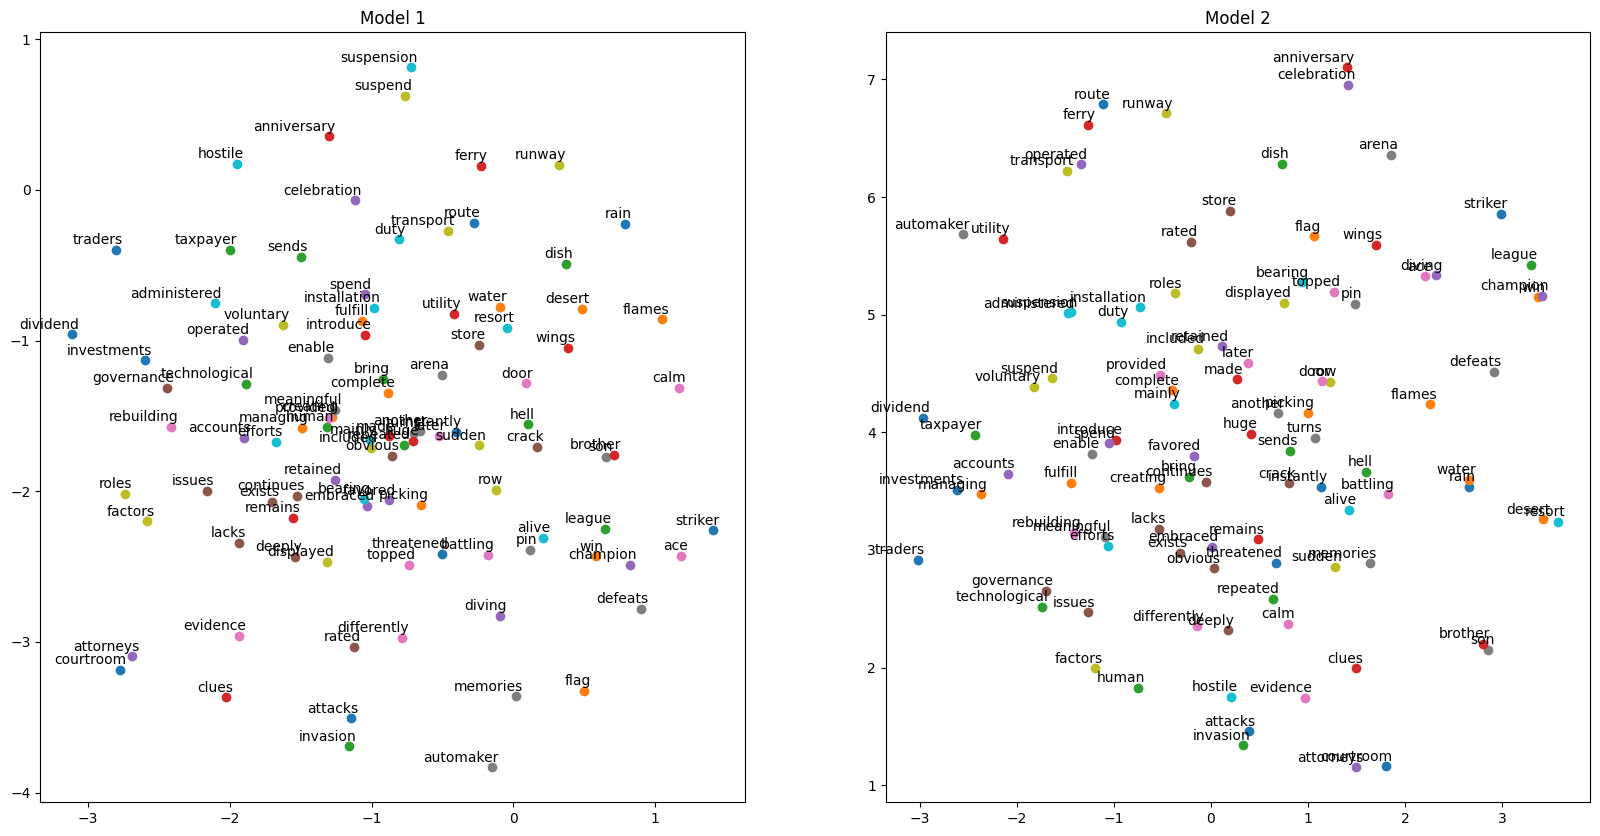

In [24]:
print("Words most similar to 'computer' with wod2Vec and glove respectively")
print(w2v_model.most_similar("computer")[:3])
print(glove_model.most_similar("computer")[:3])

print("2D projection of some common words of both models")

#Both w2v and glove model,, store words in a specific order, index_to_key gives us the word themselves
# mainly in order of their frequency, by using 100 as the starting index, we remove words like "is", "and", "the" etc
## We convert the list to set for because it allows for quick search
### By usin '&', we are taking only the words that are common in both.
#### Finally we take the first 100 common words.
#sample_common_words = list(set(glove_model.index_to_key[100:10000]))[:100]

sample_common_words = list(set(w2v_model.index_to_key[100:10000]) 
                           & set(glove_model.index_to_key[100:10000]))[:100]

tsne_plot([w2v_model, glove_model], sample_common_words)